In [8]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [76]:
#MODEL = "0110"

MODEL = "0144"

#MODEL = "coronary"

#PATH  = "aorta"
#PATH  = "right_iliac"

#PATH = "aorta"
#PATH = "celiac_hepatic"
#PATH = "celiac_splenic"
#PATH = "ext_iliac_left"
PATH = "renal_left"
#PATH = "renal_right"
#PATH = "SMA"

## coronary paths ##
#PATH = "lc1"
#PATH = "lc1_sub1"
#PATH = "lc1_sub2"
#PATH = "lc1_sub3"
#PATH = "lc2"
#PATH = "lc2_sub1"

CASE  = "sim_wom_rcr"
#CASE = "sim_cor_inflow"

mesh  = "coarse"

gen   = 2

quants   = [
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

dt       = 0.004

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+".csv"
    
df = pd.read_csv(DIR)

OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)+"/"+PATH
io.mkdir(OUTPUT)
OUTPUT = OUTPUT+'/'+mesh
io.mkdir(OUTPUT)

models   = df['model'].unique()

#df = pd.read_csv(CSV)
#df = df.loc[df['mesh']==mesh]
#df = df.loc[df['generation'] == gen]

df['pressure_0'] = df['pressure_0']

points = df['point'].unique()
print(points)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]


In [77]:
df = df.loc[df['path']==PATH]

In [78]:
df.iloc[:10]

,Unnamed: 0,Unnamed: 0.1,area,generation,length,mesh,model,nx,ny,nz,...,velocity_0_boundary,velocity_1,velocity_1_boundary,velocity_2,velocity_2_boundary,velocity_3,velocity_3_boundary,x,y,z
2795463,0,0,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-0.088954,1.110657,2.816356,-8.132975,-7.929437,8.760875,8.955586,0.6395,15.6562,-43.788898
2795464,1,1,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-0.269584,6.910650,8.330763,-25.467033,-23.793147,26.633370,25.619177,0.6395,15.6562,-43.788898
2795465,2,2,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-1.795228,11.807208,12.980816,-42.757236,-38.731007,44.712541,41.366550,0.6395,15.6562,-43.788898
2795466,3,3,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,0.926937,11.439139,13.728753,-56.882862,-51.581021,58.268755,53.924387,0.6395,15.6562,-43.788898
2795467,4,4,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-1.258536,13.966264,14.607785,-58.719101,-52.270226,60.702728,54.903112,0.6395,15.6562,-43.788898
2795468,5,5,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-1.948694,14.708411,14.524676,-58.984121,-52.897511,61.234451,56.193357,0.6395,15.6562,-43.788898
2795469,6,6,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-2.338951,13.019956,13.079070,-52.135759,-47.800319,54.523081,52.091928,0.6395,15.6562,-43.788898
2795470,7,7,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-2.699425,9.381773,10.585150,-41.494422,-41.163274,43.981420,46.747549,0.6395,15.6562,-43.788898
2795471,8,8,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-2.627530,3.549037,7.134773,-27.086388,-29.530526,31.479015,37.101905,0.6395,15.6562,-43.788898
2795472,9,9,3.13018,1,6.273096,coarse,0,-0.791017,-0.310918,-0.526899,...,-2.211449,-2.340385,2.153885,-12.273137,-13.441184,24.722918,25.431529,0.6395,15.6562,-43.788898


In [79]:
# if PATH == "lc1":
#      df = df.loc[(df['point']!=31) & (df['point']!=35)]

# if PATH == "lc1_sub1":
#      df = df.loc[(df['point']!=14)]    
        
# if PATH == "lc1_sub2":
#      df = df.loc[(df['point']!=4) & (df['point']!=5) & (df['point']!=3)]    

# #if PATH == "lc1_sub3":
# #    df = df.loc[(df['point']!=5) & (df['point']!=6) & (df['point']!=7) & (df['point']!=8)\
# #               & (df['point']!=9) & (df['point']!=4) & (df['point']!=10) & (df['point']!=11)]    

# if PATH == "lc2":
#     df = df.loc[(df['point']!=14) & (df['point']!=15)]    

# if PATH == "lc2_sub1":
#     df = df.loc[(df['point']!=7)]    


In [80]:
df_mean = df.groupby(['point','model']).mean().groupby('point').mean()
df_std  = df.groupby(['point','model']).mean().groupby('point').std()

df_std['x'] = df_mean['x']
df_std['y'] = df_mean['y']
df_std['z'] = df_mean['z']

df_mean['path'] = PATH
df_std['path'] = PATH

df_mean.to_csv(OUTPUT+'/mean.csv')
df_std.to_csv(OUTPUT+'/std.csv')
print(df_std['vWSS_3_boundary'].iloc[:]/df_mean['vWSS_3_boundary'].iloc[:])

point
0     2.151003
1     0.337567
2     0.114059
3     0.064953
4     0.189291
5     0.147273
6     0.075274
7     0.108168
8     0.156199
9     0.204487
10    0.308162
11    0.208415
12    0.161256
13    0.112219
14    0.051926
15    0.038236
16    0.040655
17    0.040149
18    0.039168
19    0.038005
20    0.068241
21    0.041717
22    0.037709
23    0.039544
24    0.040663
25    0.040603
26    0.045637
27    0.053829
28    0.065662
29    0.059690
30    0.057156
31    0.050704
32    0.044762
33    0.041488
34    0.046067
35    0.048538
36    0.053507
37    0.057701
38    0.064756
39    0.069382
40    0.073604
41    0.075566
42    0.073993
43    0.067127
44    0.058208
45    0.057650
46    0.069875
47    0.084192
48    0.079743
49    0.056614
50    0.073563
51    0.085014
52    0.054656
53    0.064722
54    0.075187
55    0.067952
56    0.067086
57    0.054987
58    0.042963
59    0.039907
Name: vWSS_3_boundary, dtype: float64


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


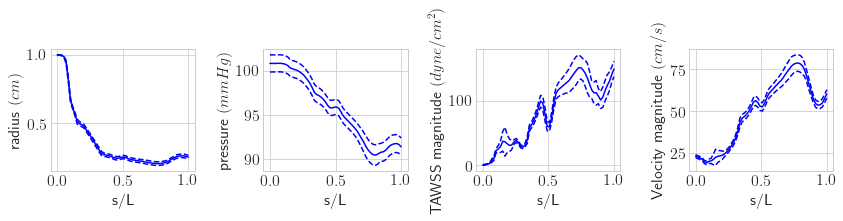

In [81]:
Size  = 3
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))
for i,q in enumerate(quants):

    Y = df_mean[q].values
    S = df_std[q].values
    X = np.arange(len(Y))*1.0/(len(Y)-1)

    label = labels[i]

    
    axarr[i].plot(X,Y, color='b')
    axarr[i].plot(X,Y+2*S,color='b',linestyle='--')
    axarr[i].plot(X,Y-2*S,color='b',linestyle='--')
    axarr[i].set_xlabel("s/L")
    axarr[i].set_ylabel(label)
    axarr[i].legend()

plt.tight_layout()
plt.savefig(OUTPUT+'/avg.png'.format(q),dpi=300)
plt.savefig(OUTPUT+'/avg.pdf'.format(q),dpi=200)

plt.show()
plt.close()